<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/response_quality/completeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>


<h1 style="text-align: center;">Evaluating Response Completeness</h1>


**What is Response Completeness?**: Response Completeness is a metric that determines how well a model answers all aspects of a question. This is important when making important decisions where you want to consider all aspects of a question.

For example, if you are asking a model to determine if a person is eligible for a loan, you want to make sure that the model considers all aspects of the person's financial situation. If the model only considers the person's income, it may not be able to make an accurate decision.

**Data schema**: The data schema required for this evaluation is as follows:

| Column Name | Description                     |
| ----------- | ------------------------------- |
| question    | The question asked by the user  |
| response    | The response given by the model |


 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
good_data = [{
    "question": "What are the best ways to save money?",
    "response": "There are many ways to save money, including:\
\
* Creating a budget and tracking your spending\
* Cutting back on unnecessary expenses\
* Saving money on your groceries and other everyday purchases\
* Investing your money wisely\
\
Here are some specific tips for saving money:\
\
* Set financial goals. What are you saving for? Once you know what you're saving for, you can create a plan to reach your goals.\
* Create a budget. A budget can help you track your income and expenses, so you can see where your money is going and make changes to save more.\
* Cut back on unnecessary expenses. Take a close look at your spending and identify any areas where you can cut back. For example, you could cook more meals at home instead of eating out, or cancel unused subscriptions.\
* Save money on your groceries and other everyday purchases. There are many ways to save money on groceries and other everyday purchases, such as using coupons, shopping at discount stores, and buying in bulk.\
* Invest your money wisely. Investing is a great way to grow your money over time. However, it's important to do your research and invest in a way that's appropriate for your risk tolerance and financial goals."
},
    {
    "question": "What are the different types of business loans?",
    "response": "There are many different types of business loans available, depending on the needs of your business. Some of the most common types of business loans include:\
\
\
* Term loans: Term loans are repaid over a set period of time, typically with equal monthly payments.\
* Line of credit: A line of credit is a revolving loan that you can borrow from and repay as needed.\
* Equipment loans: Equipment loans are used to finance the purchase of equipment for your business.\
* Real estate loans: Real estate loans are used to finance the purchase of commercial real estate for your business.\
* SBA loans: SBA loans are guaranteed by the Small Business Administration, making them easier to qualify for.\
\
To choose the right type of business loan for your needs, you should consider the following factors:\
\
* The amount of money you need to borrow\
* The purpose of the loan\
* Your credit score and financial history\
* The term of the loan\
* The interest rate\
\
You should also compare offers from multiple lenders before choosing a loan."
}]

bad_data = [{
    "question": "What are the best ways to save money?",
    "response": "Just don't spend money. It's that simple.",
    },
    {
    "question": "What are the tax implications of starting a business?",
    "response": "Taxes are complicated. You should hire an accountant to help you with your taxes.",
    }]

data = good_data + bad_data

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-****************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.RESPONSE_COMPLETENESS]
)

2024-01-31 23:24:13.536 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res, indent=3))

[
   {
      "question": "What are the best ways to save money?",
      "response": "There are many ways to save money, including:* Creating a budget and tracking your spending* Cutting back on unnecessary expenses* Saving money on your groceries and other everyday purchases* Investing your money wiselyHere are some specific tips for saving money:* Set financial goals. What are you saving for? Once you know what you're saving for, you can create a plan to reach your goals.* Create a budget. A budget can help you track your income and expenses, so you can see where your money is going and make changes to save more.* Cut back on unnecessary expenses. Take a close look at your spending and identify any areas where you can cut back. For example, you could cook more meals at home instead of eating out, or cancel unused subscriptions.* Save money on your groceries and other everyday purchases. There are many ways to save money on groceries and other everyday purchases, such as using coupons,

## Step 4: Let's look at some of the results 

### Sample with complete responses

In [5]:
print(json.dumps(res[0],indent=3))

{
   "question": "What are the best ways to save money?",
   "response": "There are many ways to save money, including:* Creating a budget and tracking your spending* Cutting back on unnecessary expenses* Saving money on your groceries and other everyday purchases* Investing your money wiselyHere are some specific tips for saving money:* Set financial goals. What are you saving for? Once you know what you're saving for, you can create a plan to reach your goals.* Create a budget. A budget can help you track your income and expenses, so you can see where your money is going and make changes to save more.* Cut back on unnecessary expenses. Take a close look at your spending and identify any areas where you can cut back. For example, you could cook more meals at home instead of eating out, or cancel unused subscriptions.* Save money on your groceries and other everyday purchases. There are many ways to save money on groceries and other everyday purchases, such as using coupons, shopping a

### Sample with incomplete responses

In [6]:
print(json.dumps(res[3],indent=3))

{
   "question": "What are the tax implications of starting a business?",
   "response": "Taxes are complicated. You should hire an accountant to help you with your taxes.",
   "score_response_completeness": 0.0,
   "explanation_response_completeness": " \"The LLM response doesn't answer the user query at all because it fails to provide any information about the tax implications of starting a business. Instead, it simply suggests hiring an accountant, which does not address the specific tax-related concerns of the user. The user will be highly dissatisfied with this answer as it does not provide any relevant information about the tax implications of starting a business.\"\n"
}


## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [7]:
from uptrain import APIClient, Evals
import json

UPTRAIN_API_KEY = "up-****************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-completeness-evals",
    data = data,
    checks = [Evals.RESPONSE_COMPLETENESS]
)

2024-01-31 23:24:35.754 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [8]:
print(json.dumps(res, indent=3))

[
   {
      "question": "What are the best ways to save money?",
      "response": "There are many ways to save money, including:* Creating a budget and tracking your spending* Cutting back on unnecessary expenses* Saving money on your groceries and other everyday purchases* Investing your money wiselyHere are some specific tips for saving money:* Set financial goals. What are you saving for? Once you know what you're saving for, you can create a plan to reach your goals.* Create a budget. A budget can help you track your income and expenses, so you can see where your money is going and make changes to save more.* Cut back on unnecessary expenses. Take a close look at your spending and identify any areas where you can cut back. For example, you could cook more meals at home instead of eating out, or cancel unused subscriptions.* Save money on your groceries and other everyday purchases. There are many ways to save money on groceries and other everyday purchases, such as using coupons,

### Dashboards: 
Histogram of score vs number of cases with that score

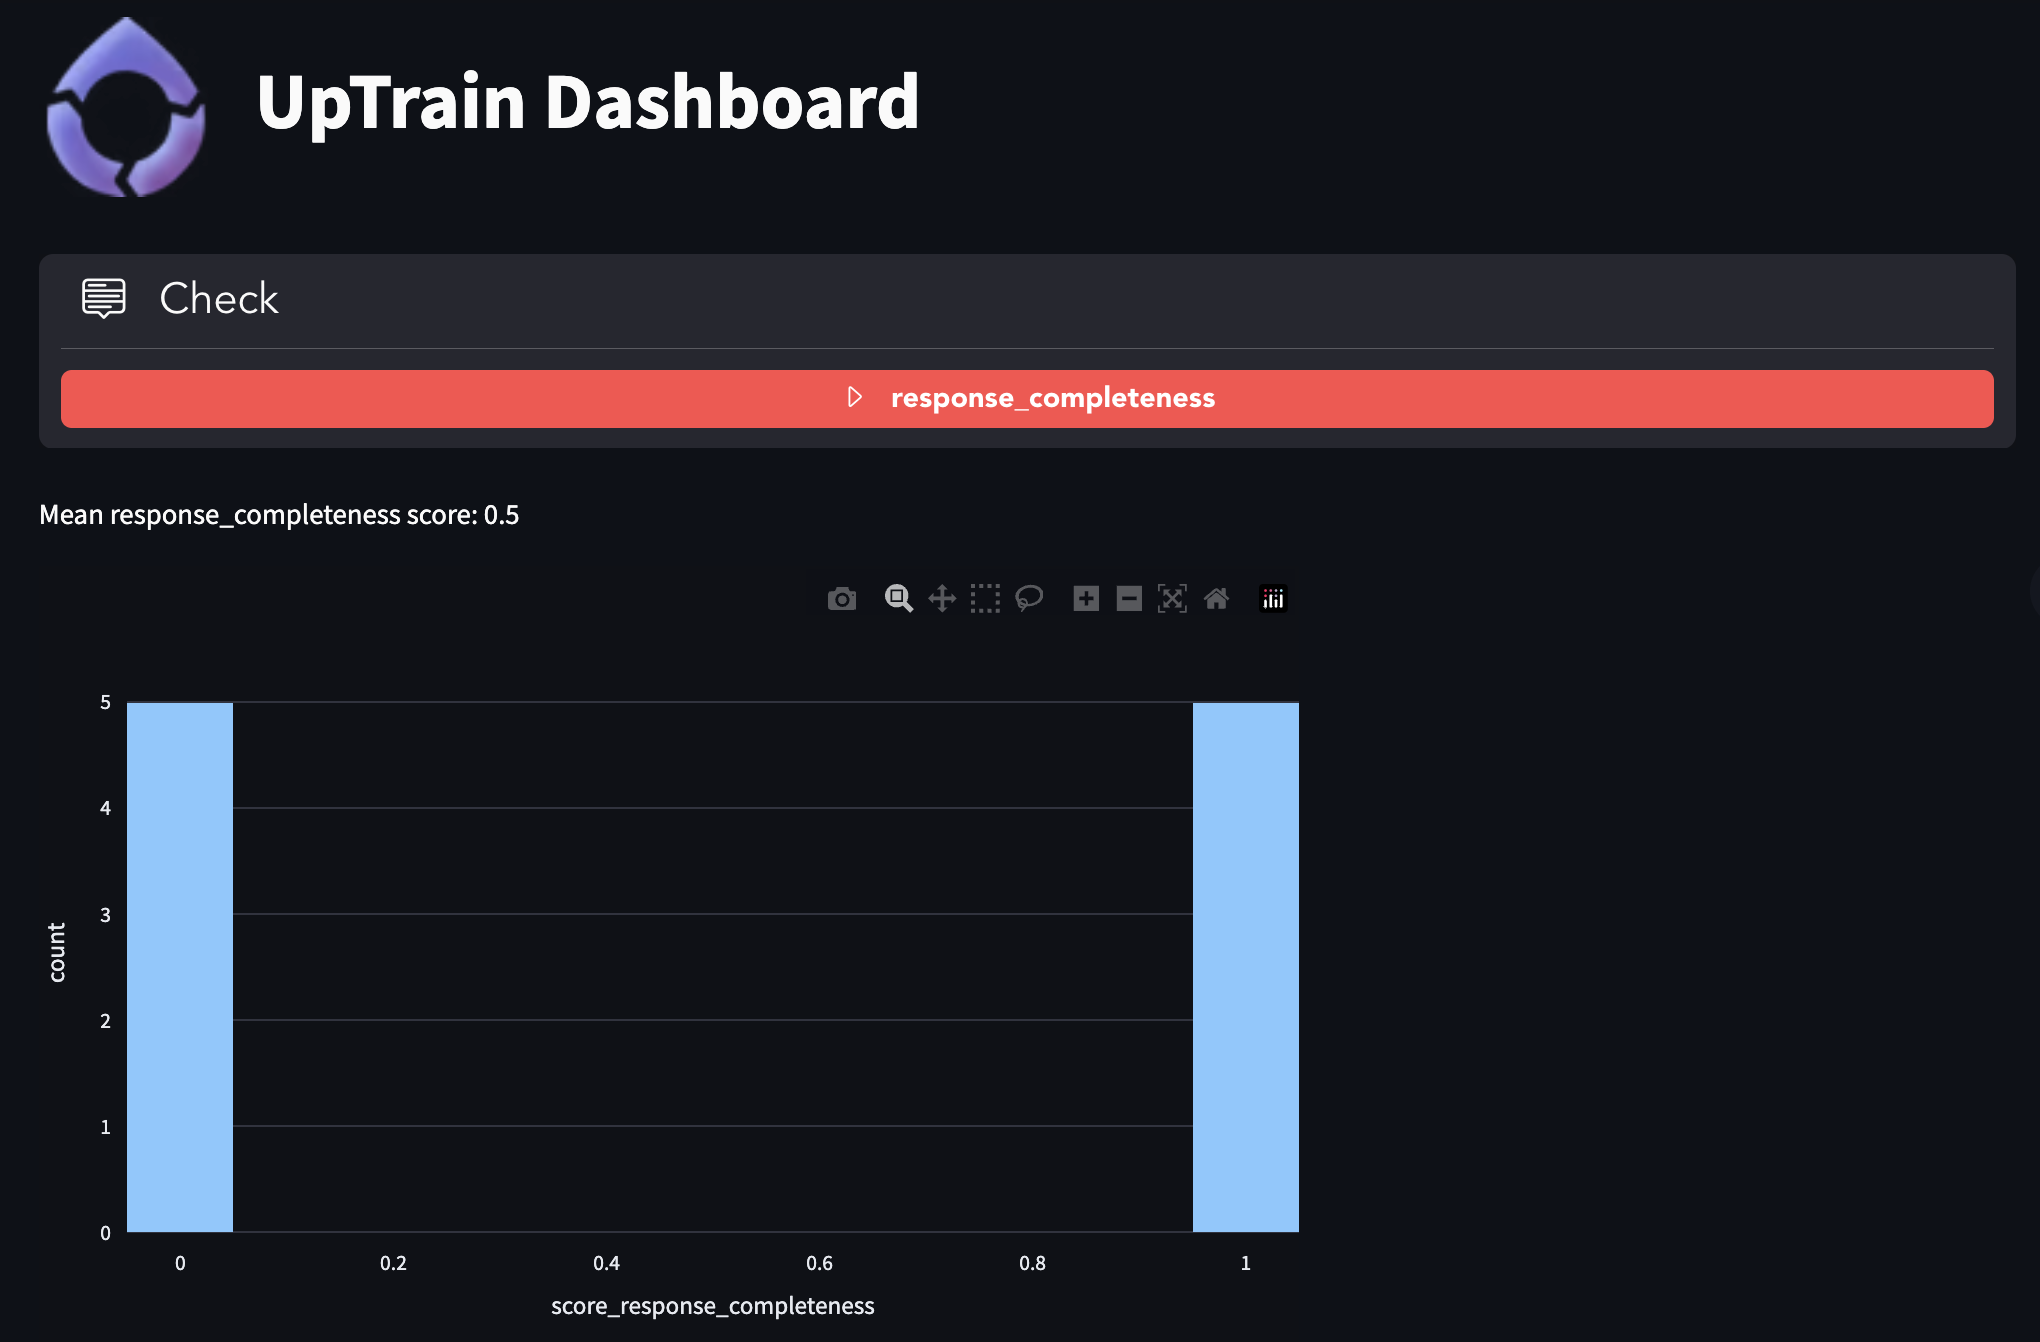

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

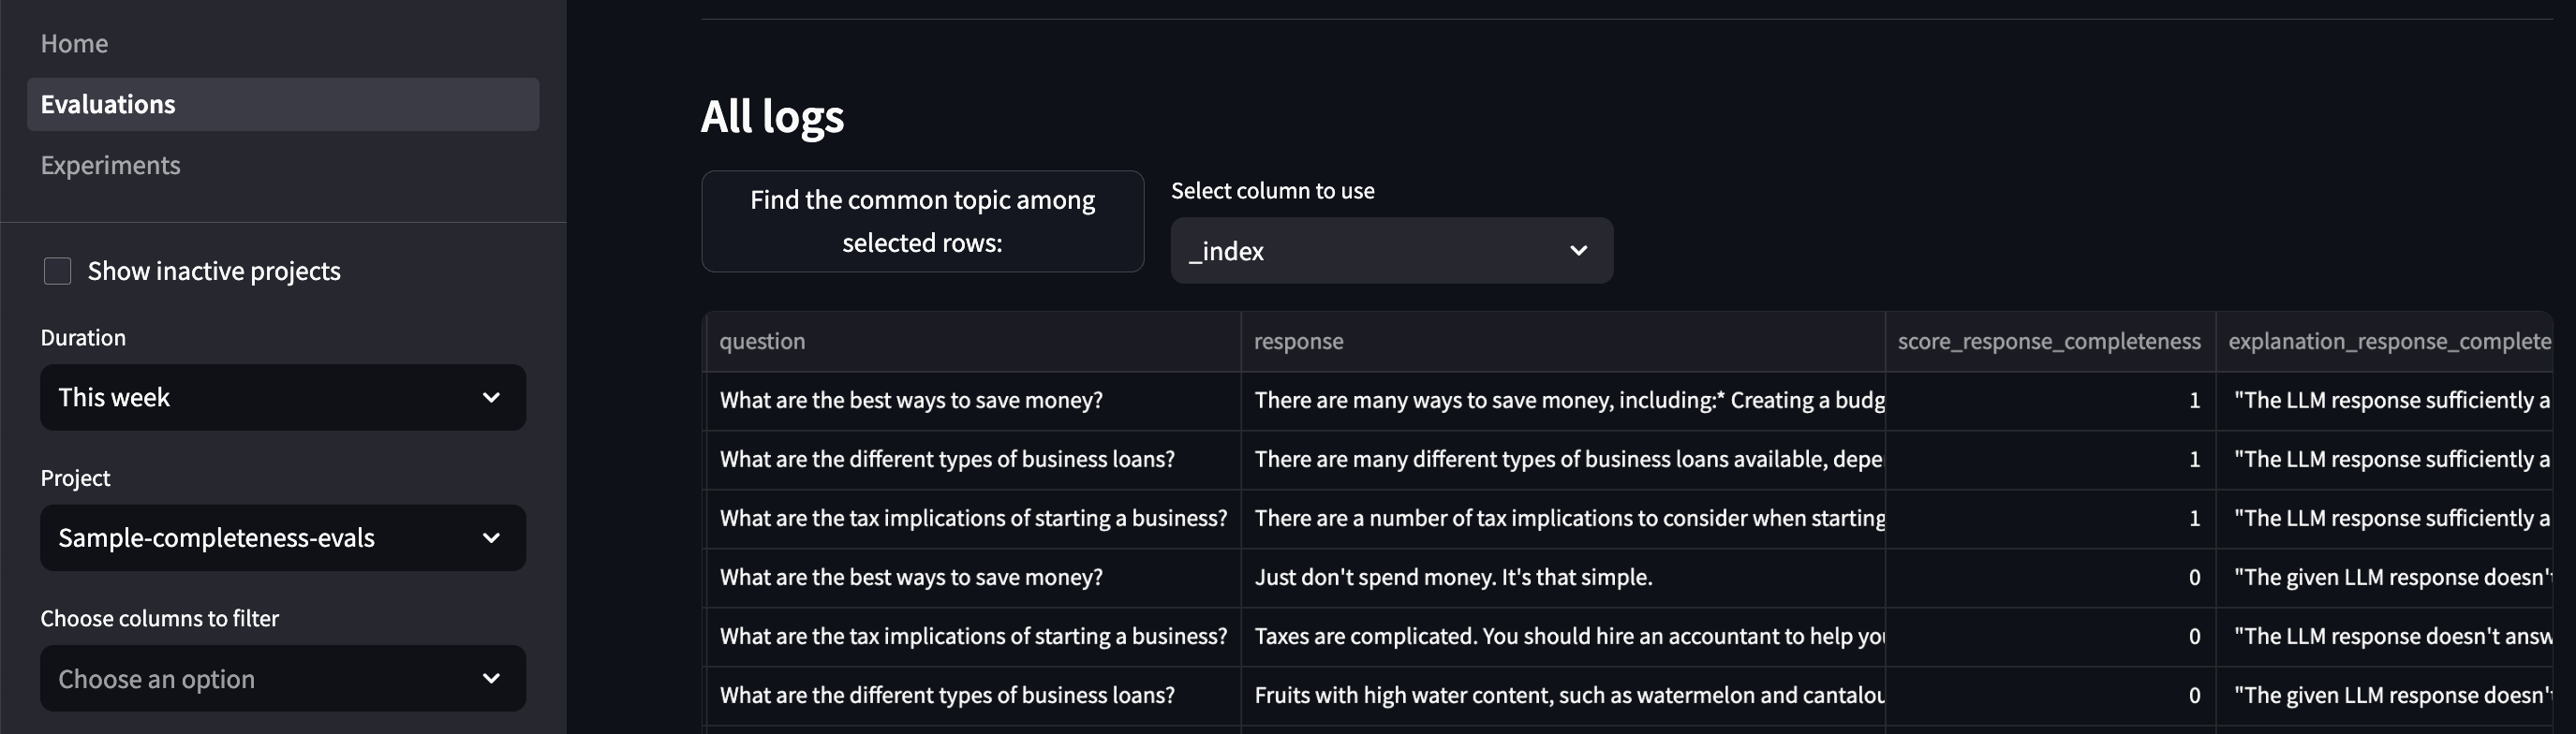